In [8]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       

prices=list()
sentiment=list()
for file in files:
    
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector=[]
    meanvector=[]
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalSentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,22)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,24)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,26)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,28)),axis=1)
    

    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=26,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=28,center=False).mean()


In [9]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
(2861, 25)
372.7593720314938
Window: 0
[[166 117]
 [154 129]]
F1,score 0.4877126654064272
Accuracy: 0.5212014134275619
11.787686347935873
Window: 4
[[170 107]
 [151 137]]
F1,score 0.5150375939849625
Accuracy: 0.5433628318584071
372.7593720314938
Window: 5
[[160 122]
 [128 155]]
F1,score 0.5535714285714286
Accuracy: 0.5575221238938053
227.58459260747887
Window: 25
[[184 106]
 [145 126]]
F1,score 0.5009940357852883
Accuracy: 0.5525846702317291
166.81005372000558
Window: 26
[[176 110]
 [147 128]]
F1,score 0.49902534113060426
Accuracy: 0.5418894830659536
610.5402296585327
Window: 125
[[144 155]
 [111 131]]
F1,score 0.49621212121212116
Accuracy: 0.5083179297597042
372.7593720314938
Window: 130
[[153 140]
 [ 97 150]]
F1,score 0.5586592178770949
Accuracy: 0.5611111111111111
10000.0
Window: 250
[[ 57  98]
 [163 198]]
F1,score 0.6027397260273973
Accuracy: 0.4941860465116279
166.81005372000558
Window: 260
[[ 82  90]
 [180 162]]
F1,score 0.5454545454545454
Accuracy: 0.474708171

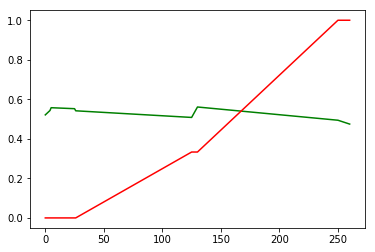

Working on... AMZN
(2718, 25)
0.0001
Window: 0
[[ 52 215]
 [ 42 230]]
F1,score 0.6415620641562064
Accuracy: 0.5231910946196661
10000.0
Window: 4
[[139 101]
 [176 122]]
F1,score 0.46833013435700577
Accuracy: 0.4851301115241636
0.000774263682681127
Window: 5
[[ 22 217]
 [ 31 268]]
F1,score 0.6836734693877551
Accuracy: 0.5390334572490706
0.000774263682681127
Window: 25
[[ 48 142]
 [136 208]]
F1,score 0.5994236311239193
Accuracy: 0.4794007490636704
0.3593813663804626
Window: 26
[[105  89]
 [170 170]]
F1,score 0.5676126878130218
Accuracy: 0.5149812734082397
11.787686347935873
Window: 125
[[106  82]
 [116 210]]
F1,score 0.6796116504854369
Accuracy: 0.6147859922178989
1291.5496650148827
Window: 130
[[102  84]
 [ 98 229]]
F1,score 0.715625
Accuracy: 0.645224171539961
10000.0
Window: 250
[[ 18 110]
 [ 94 267]]
F1,score 0.7235772357723578
Accuracy: 0.5828220858895705
0.046415888336127774
Window: 260
[[ 36  96]
 [ 73 282]]
F1,score 0.7694406548431105
Accuracy: 0.6529774127310062
[0, 0, 0, 0, 0, 2

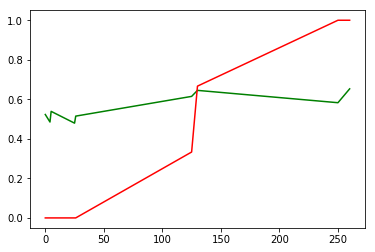

Working on... GOOGL
(3995, 25)
10000.0
Window: 0
[[203 193]
 [215 187]]
F1,score 0.4782608695652174
Accuracy: 0.48872180451127817
0.000774263682681127
Window: 4
[[ 70 313]
 [114 300]]
F1,score 0.5842259006815969
Accuracy: 0.4642409033877039
0.000774263682681127
Window: 5
[[ 65 312]
 [ 97 323]]
F1,score 0.6123222748815166
Accuracy: 0.4868255959849435
372.7593720314938
Window: 25
[[116 257]
 [117 303]]
F1,score 0.6183673469387755
Accuracy: 0.5283732660781841
138.94954943731375
Window: 26
[[124 256]
 [113 300]]
F1,score 0.6191950464396285
Accuracy: 0.5346784363177806
138.94954943731375
Window: 125
[[163 212]
 [114 284]]
F1,score 0.6353467561521253
Accuracy: 0.5782664941785253
84.83428982440716
Window: 130
[[151 226]
 [121 274]]
F1,score 0.6122905027932961
Accuracy: 0.5505181347150259
0.000774263682681127
Window: 250
[[ 79 298]
 [155 216]]
F1,score 0.488135593220339
Accuracy: 0.39438502673796794
0.046415888336127774
Window: 260
[[345  37]
 [292  72]]
F1,score 0.3044397463002114
Accuracy: 0

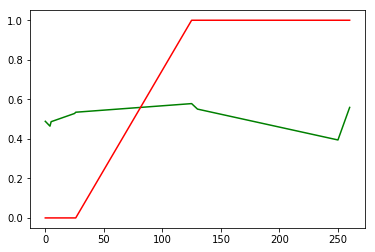

Working on... MSFT
(4576, 25)
1000.0
Window: 0
[[187 256]
 [208 258]]
F1,score 0.5265306122448979
Accuracy: 0.48954895489548955
0.005994842503189409
Window: 4
[[ 33 370]
 [ 74 431]]
F1,score 0.6600306278713628
Accuracy: 0.5110132158590308
0.3593813663804626
Window: 5
[[110 293]
 [155 350]]
F1,score 0.6097560975609756
Accuracy: 0.5066079295154186
0.000774263682681127
Window: 25
[[ 43 321]
 [138 402]]
F1,score 0.6365795724465558
Accuracy: 0.4922566371681416
0.000774263682681127
Window: 26
[[ 10 347]
 [ 51 496]]
F1,score 0.7136690647482016
Accuracy: 0.5597345132743363
1291.5496650148827
Window: 125
[[141 171]
 [231 341]]
F1,score 0.6291512915129152
Accuracy: 0.5452488687782805
10000.0
Window: 130
[[ 91 211]
 [210 371]]
F1,score 0.6380051590713671
Accuracy: 0.5232163080407701
84.83428982440716
Window: 250
[[ 71 176]
 [199 413]]
F1,score 0.687760199833472
Accuracy: 0.5634458672875436
10000.0
Window: 260
[[ 84 180]
 [186 407]]
F1,score 0.6898305084745763
Accuracy: 0.572928821470245
[0, 0, 0,

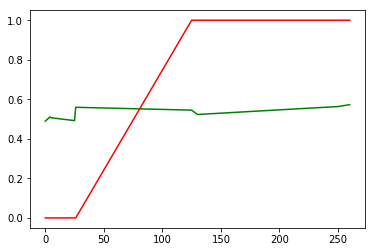

Working on... FB
(4561, 25)
138.94954943731375
Window: 0
[[179 259]
 [170 298]]
F1,score 0.5814634146341463
Accuracy: 0.5264900662251656
10000.0
Window: 4
[[218 220]
 [238 229]]
F1,score 0.5
Accuracy: 0.49392265193370166
138.94954943731375
Window: 5
[[214 227]
 [247 217]]
F1,score 0.4779735682819383
Accuracy: 0.47624309392265196
4.39397056076079
Window: 25
[[253 177]
 [312 159]]
F1,score 0.39405204460966536
Accuracy: 0.4572697003329634
7.196856730011519
Window: 26
[[257 172]
 [303 169]]
F1,score 0.4157441574415744
Accuracy: 0.4728079911209767
166.81005372000558
Window: 125
[[240 138]
 [293 210]]
F1,score 0.4935370152761457
Accuracy: 0.5107832009080591
11.787686347935873
Window: 130
[[297  93]
 [319 171]]
F1,score 0.453580901856764
Accuracy: 0.5318181818181819
19.306977288832496
Window: 250
[[287 175]
 [231 163]]
F1,score 0.44535519125683065
Accuracy: 0.5257009345794392
138.94954943731375
Window: 260
[[212 256]
 [240 146]]
F1,score 0.3705583756345178
Accuracy: 0.41920374707259955
[0, 0,

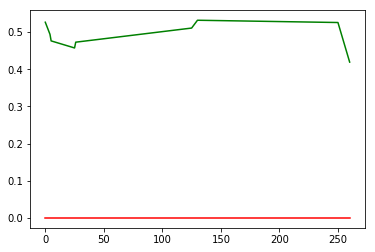

Working on... INTC
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1.637893706954064
Window: 0
[[200 242]
 [205 262]]
F1,score 0.5396498455200824
Accuracy: 0.5082508250825083
7.196856730011519
Window: 4
[[175 254]
 [201 278]]
F1,score 0.5499505440158259
Accuracy: 0.4988986784140969
10000.0
Window: 5
[[193 221]
 [234 260]]
F1,score 0.5333333333333333
Accuracy: 0.4988986784140969
227.58459260747887
Window: 25
[[169 222]
 [233 280]]
F1,score 0.5517241379310345
Accuracy: 0.49668141592920356
1000.0
Window: 26
[[158 226]
 [244 276]]
F1,score 0.5401174168297457
Accuracy: 0.48008849557522126
0.046415888336127774
Window: 125
[[130 112]
 [248 394]]
F1,score 0.6864111498257839
Accuracy: 0.5927601809954751
0.046415888336127774
Window: 130
[[112 116]
 [236 419]]
F1,score 0.7042016806722688
Accuracy: 0.6013590033975085
0.046415888336127774
Window: 250
[[125 120]
 [254 360]]
F1,score 0.6581352833638026
Accuracy: 0.5646100116414435
0.3593813663804626
Window: 260
[[123 123]
 [206 405]]
F1,score 0.7111501316944688
Accuracy: 0.6161026837806302
[0, 0, 0, 0, 0, 0, 0, 75, 

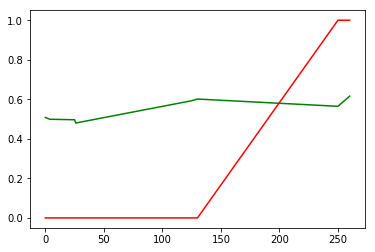

Working on... CSCO
(4575, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.000774263682681127
Window: 0
[[327 115]
 [354 113]]
F1,score 0.3251798561151079
Accuracy: 0.48404840484048406
0.0001
Window: 4
[[ 17 414]
 [ 15 462]]
F1,score 0.6829268292682927
Accuracy: 0.5275330396475771
0.0001
Window: 5
[[  8 414]
 [  9 477]]
F1,score 0.6928104575163399
Accuracy: 0.5341409691629956
11.787686347935873
Window: 25
[[ 99 336]
 [194 275]]
F1,score 0.5092592592592593
Accuracy: 0.413716814159292
0.3593813663804626
Window: 26
[[140 292]
 [209 263]]
F1,score 0.5121713729308665
Accuracy: 0.44579646017699115
0.046415888336127774
Window: 125
[[108 240]
 [217 319]]
F1,score 0.582648401826484
Accuracy: 0.4830316742081448
0.3593813663804626
Window: 130
[[ 98 238]
 [170 377]]
F1,score 0.648881239242685
Accuracy: 0.5379388448471121
610.5402296585327
Window: 250
[[ 71 180]
 [230 378]]
F1,score 0.6483704974271012
Accuracy: 0.5227008149010477
1291.5496650148827
Window: 260
[[ 94 156]
 [159 448]]
F1,score 0.7398843930635839
Accuracy: 0.632438739789965
[0, 0, 0, 0, 0, 0, 0, 75, 75]
[0

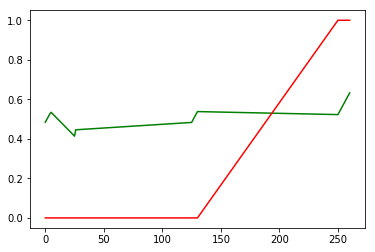

Working on... CMCSA
(4569, 25)
10000.0
Window: 0
[[223 211]
 [245 230]]
F1,score 0.5021834061135372
Accuracy: 0.49834983498349833
51.7947467923121
Window: 4
[[199 241]
 [173 295]]
F1,score 0.5876494023904382
Accuracy: 0.5440528634361234
84.83428982440716
Window: 5
[[211 222]
 [212 263]]
F1,score 0.5479166666666666
Accuracy: 0.5220264317180616
21.54434690031882
Window: 25
[[321 154]
 [194 235]]
F1,score 0.5745721271393643
Accuracy: 0.6150442477876106
0.005994842503189409
Window: 26
[[461  17]
 [412  14]]
F1,score 0.06126914660831511
Accuracy: 0.5254424778761062
10000.0
Window: 125
[[232 332]
 [150 170]]
F1,score 0.41362530413625304
Accuracy: 0.45475113122171945
1291.5496650148827
Window: 130
[[233 328]
 [152 170]]
F1,score 0.41463414634146345
Accuracy: 0.4563986409966025
84.83428982440716
Window: 250
[[178 380]
 [107 194]]
F1,score 0.44342857142857145
Accuracy: 0.4330616996507567
166.81005372000558
Window: 260
[[160 408]
 [109 180]]
F1,score 0.4104903078677309
Accuracy: 0.39673278879813

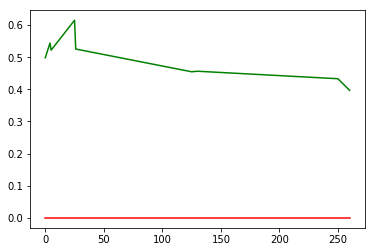

Working on... NVDA
(4576, 25)
7.196856730011519
Window: 0
[[206 253]
 [223 227]]
F1,score 0.4881720430107527
Accuracy: 0.47634763476347636
84.83428982440716
Window: 4
[[207 221]
 [266 214]]
F1,score 0.4677595628415301
Accuracy: 0.46365638766519823
84.83428982440716
Window: 5
[[214 222]
 [272 200]]
F1,score 0.44742729306487694
Accuracy: 0.45594713656387664
0.3593813663804626
Window: 25
[[133 217]
 [303 251]]
F1,score 0.4911937377690802
Accuracy: 0.4247787610619469
0.3593813663804626
Window: 26
[[132 227]
 [273 272]]
F1,score 0.5210727969348659
Accuracy: 0.4469026548672566
0.046415888336127774
Window: 125
[[ 61 308]
 [277 238]]
F1,score 0.44863336475023563
Accuracy: 0.3382352941176471
1.637893706954064
Window: 130
[[ 66 298]
 [298 221]]
F1,score 0.4258188824662813
Accuracy: 0.3250283125707814
10000.0
Window: 250
[[ 84 240]
 [169 366]]
F1,score 0.6415425065731815
Accuracy: 0.5238649592549476
10000.0
Window: 260
[[ 77 245]
 [162 373]]
F1,score 0.6470078057241977
Accuracy: 0.525087514585764

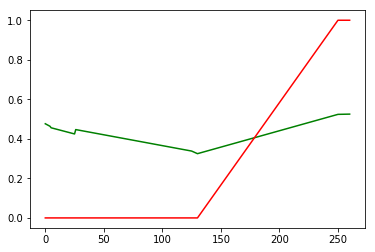

Working on... NFLX
(4575, 25)
0.005994842503189409
Window: 0
[[181 256]
 [209 263]]
F1,score 0.5307769929364279
Accuracy: 0.4884488448844885
0.000774263682681127
Window: 4
[[122 272]
 [192 322]]
F1,score 0.5812274368231047
Accuracy: 0.4889867841409692
0.005994842503189409
Window: 5
[[ 80 313]
 [159 356]]
F1,score 0.6013513513513513
Accuracy: 0.4801762114537445
0.3593813663804626
Window: 25
[[220 119]
 [300 265]]
F1,score 0.5584826132771338
Accuracy: 0.536504424778761
0.3593813663804626
Window: 26
[[215 126]
 [299 264]]
F1,score 0.5540398740818469
Accuracy: 0.5298672566371682
10000.0
Window: 125
[[ 70 164]
 [211 439]]
F1,score 0.7007182761372706
Accuracy: 0.5757918552036199
610.5402296585327
Window: 130
[[116 122]
 [270 375]]
F1,score 0.6567425569176882
Accuracy: 0.5560588901472253
0.000774263682681127
Window: 250
[[  6 137]
 [281 435]]
F1,score 0.6754658385093167
Accuracy: 0.5133876600698487
0.005994842503189409
Window: 260
[[ 27 109]
 [331 390]]
F1,score 0.639344262295082
Accuracy: 0.

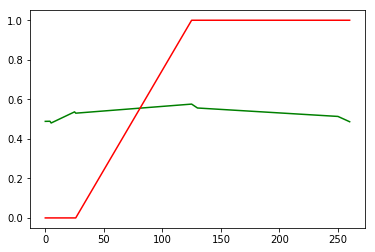

Working on... ADBE
(4574, 25)
372.7593720314938
Window: 0
[[304 115]
 [329 161]]
F1,score 0.42036553524804177
Accuracy: 0.5115511551155115
21.54434690031882
Window: 4
[[197 229]
 [245 237]]
F1,score 0.4999999999999999
Accuracy: 0.4779735682819383
610.5402296585327
Window: 5
[[254 168]
 [271 215]]
F1,score 0.49482163406214036
Accuracy: 0.5165198237885462
1000.0
Window: 25
[[192 207]
 [291 214]]
F1,score 0.4622030237580993
Accuracy: 0.4491150442477876
10000.0
Window: 26
[[167 238]
 [301 198]]
F1,score 0.4235294117647059
Accuracy: 0.40376106194690264
10000.0
Window: 125
[[ 69 229]
 [159 427]]
F1,score 0.6876006441223831
Accuracy: 0.5610859728506787
227.58459260747887
Window: 130
[[ 95 191]
 [187 410]]
F1,score 0.6844741235392321
Accuracy: 0.5719139297848245
372.7593720314938
Window: 250
[[138  89]
 [247 385]]
F1,score 0.6962025316455696
Accuracy: 0.6088474970896391
1291.5496650148827
Window: 260
[[137  88]
 [219 413]]
F1,score 0.7290379523389233
Accuracy: 0.6417736289381564
[0, 0, 0, 0, 0

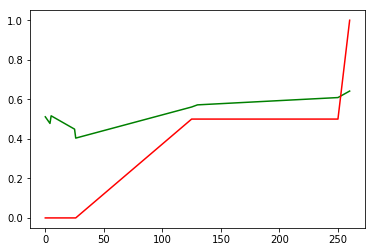

Working on... AMGN
(4573, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.3593813663804626
Window: 0
[[283 171]
 [287 168]]
F1,score 0.42317380352644834
Accuracy: 0.4961496149614962
166.81005372000558
Window: 4
[[224 198]
 [236 250]]
F1,score 0.5353319057815846
Accuracy: 0.5220264317180616
0.005994842503189409
Window: 5
[[112 305]
 [ 53 438]]
F1,score 0.7098865478119933
Accuracy: 0.6057268722466961
21.54434690031882
Window: 25
[[282 146]
 [283 193]]
F1,score 0.4736196319018405
Accuracy: 0.5254424778761062
138.94954943731375
Window: 26
[[247 181]
 [304 171]]
F1,score 0.4135429262394196
Accuracy: 0.4629014396456257
4.39397056076079
Window: 125
[[244  98]
 [270 272]]
F1,score 0.5964912280701755
Accuracy: 0.583710407239819
1.0
Window: 130
[[279  67]
 [307 230]]
F1,score 0.5515587529976019
Accuracy: 0.5764439411098528
227.58459260747887
Window: 250
[[313  32]
 [288 226]]
F1,score 0.5854922279792746
Accuracy: 0.6274738067520372
372.7593720314938
Window: 260
[[310  29]
 [277 241]]
F1,score 0.6116751269035533
Accuracy: 0.6429404900816803
[0, 0, 0, 0, 0, 0, 0, 25, 

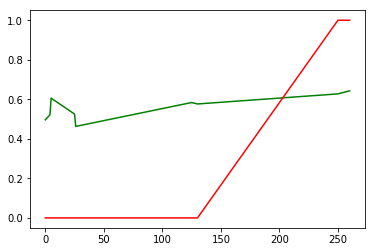

Working on... TXN
(4544, 25)
372.7593720314938
Window: 0
[[248 194]
 [252 209]]
F1,score 0.4837962962962962
Accuracy: 0.5060908084163898
166.81005372000558
Window: 4
[[235 192]
 [315 161]]
F1,score 0.38841978287092876
Accuracy: 0.43853820598006643
19.306977288832496
Window: 5
[[343  80]
 [382  97]]
F1,score 0.29573170731707316
Accuracy: 0.4878048780487805
372.7593720314938
Window: 25
[[ 87 339]
 [191 281]]
F1,score 0.5146520146520147
Accuracy: 0.40979955456570155
1291.5496650148827
Window: 26
[[118 304]
 [151 325]]
F1,score 0.588235294117647
Accuracy: 0.4933184855233853
19.306977288832496
Window: 125
[[257 199]
 [ 24 398]]
F1,score 0.7811579980372914
Accuracy: 0.7460136674259681
11.787686347935873
Window: 130
[[240 214]
 [ 30 393]]
F1,score 0.763106796116505
Accuracy: 0.7217787913340935
1.637893706954064
Window: 250
[[179 238]
 [127 309]]
F1,score 0.6286876907426246
Accuracy: 0.5720984759671747
0.3593813663804626
Window: 260
[[197 229]
 [164 261]]
F1,score 0.5704918032786884
Accuracy: 

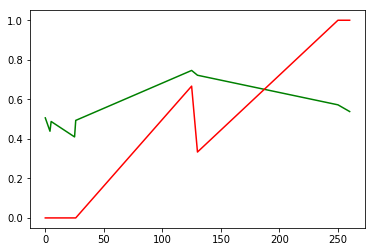

Working on... AVGO
(4575, 25)
1000.0
Window: 0
[[156 289]
 [168 296]]
F1,score 0.5643469971401335
Accuracy: 0.49724972497249725
2.6826957952797255
Window: 4
[[127 336]
 [126 319]]
F1,score 0.5800000000000001
Accuracy: 0.4911894273127753
10000.0
Window: 5
[[194 264]
 [194 256]]
F1,score 0.5278350515463918
Accuracy: 0.4955947136563877
1291.5496650148827
Window: 25
[[195 269]
 [166 274]]
F1,score 0.5574771108850458
Accuracy: 0.5188053097345132
138.94954943731375
Window: 26
[[239 229]
 [209 227]]
F1,score 0.508968609865471
Accuracy: 0.5154867256637168
138.94954943731375
Window: 125
[[318 218]
 [236 112]]
F1,score 0.3303834808259587
Accuracy: 0.48642533936651583
2.6826957952797255
Window: 130
[[246 300]
 [244  93]]
F1,score 0.2547945205479452
Accuracy: 0.38391845979614947
1000.0
Window: 250
[[376 196]
 [199  88]]
F1,score 0.30823117338003503
Accuracy: 0.540162980209546
1291.5496650148827
Window: 260
[[374 180]
 [223  80]]
F1,score 0.2841918294849023
Accuracy: 0.5297549591598599
[0, 0, 0, 0,

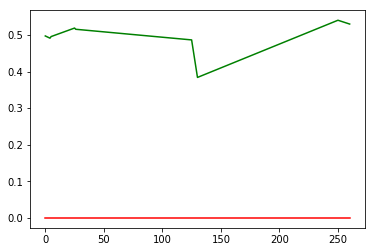

Working on... PYPL
(4551, 25)
0.3593813663804626
Window: 0
[[244 192]
 [292 181]]
F1,score 0.42789598108747046
Accuracy: 0.4675467546754675
7.196856730011519
Window: 4
[[184 242]
 [213 269]]
F1,score 0.541792547834844
Accuracy: 0.4988986784140969
2.782559402207126
Window: 5
[[145 259]
 [194 310]]
F1,score 0.5778191985088538
Accuracy: 0.501101321585903
10000.0
Window: 25
[[175 220]
 [204 305]]
F1,score 0.5899419729206963
Accuracy: 0.5309734513274337
1291.5496650148827
Window: 26
[[192 192]
 [228 292]]
F1,score 0.5816733067729083
Accuracy: 0.5353982300884956
227.58459260747887
Window: 125
[[ 55 289]
 [233 307]]
F1,score 0.540492957746479
Accuracy: 0.4095022624434389
10000.0
Window: 130
[[ 51 294]
 [236 302]]
F1,score 0.5326278659611993
Accuracy: 0.39977349943374857
1000.0
Window: 250
[[ 88 230]
 [181 360]]
F1,score 0.636604774535809
Accuracy: 0.5215366705471478
1000.0
Window: 260
[[114 206]
 [192 345]]
F1,score 0.6341911764705883
Accuracy: 0.5355892648774796
[0, 0, 0, 0, 0, 0, 0, 50, 50]

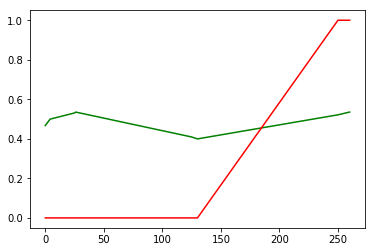

Working on... GILD
(4553, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


610.5402296585327
Window: 0
[[230 228]
 [227 224]]
F1,score 0.49612403100775193
Accuracy: 0.49944994499449946
227.58459260747887
Window: 4
[[238 228]
 [204 238]]
F1,score 0.5242290748898678
Accuracy: 0.5242290748898678
0.046415888336127774
Window: 5
[[128 348]
 [119 313]]
F1,score 0.5727355901189387
Accuracy: 0.4856828193832599
0.005994842503189409
Window: 25
[[173 350]
 [ 85 296]]
F1,score 0.5764362220058423
Accuracy: 0.5188053097345132
0.005994842503189409
Window: 26
[[175 353]
 [ 82 294]]
F1,score 0.5747800586510265
Accuracy: 0.5188053097345132
1291.5496650148827
Window: 125
[[177 277]
 [166 264]]
F1,score 0.5437693099897013
Accuracy: 0.498868778280543
10000.0
Window: 130
[[232 226]
 [189 236]]
F1,score 0.532130777903044
Accuracy: 0.5300113250283126
10000.0
Window: 250
[[261 133]
 [281 184]]
F1,score 0.4705882352941177
Accuracy: 0.5180442374854481
31.622776601683793
Window: 260
[[176 229]
 [290 162]]
F1,score 0.38434163701067614
Accuracy: 0.3943990665110852
[0, 0, 0, 0, 0, 0, 0, 50,

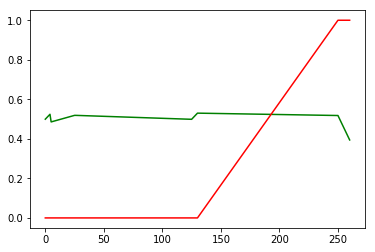

Working on... COST
(4575, 25)
0.3593813663804626
Window: 0
[[354  84]
 [390  81]]
F1,score 0.2547169811320754
Accuracy: 0.47854785478547857
19.306977288832496
Window: 4
[[239 189]
 [264 216]]
F1,score 0.48813559322033895
Accuracy: 0.501101321585903
21.54434690031882
Window: 5
[[220 210]
 [241 237]]
F1,score 0.5124324324324324
Accuracy: 0.5033039647577092
2.6826957952797255
Window: 25
[[255 194]
 [312 143]]
F1,score 0.3611111111111111
Accuracy: 0.44026548672566373
1.637893706954064
Window: 26
[[274 179]
 [339 112]]
F1,score 0.3018867924528302
Accuracy: 0.4269911504424779
2.6826957952797255
Window: 125
[[259 110]
 [392 123]]
F1,score 0.3288770053475936
Accuracy: 0.4321266968325792
2.6826957952797255
Window: 130
[[239 107]
 [385 152]]
F1,score 0.38190954773869346
Accuracy: 0.44280860702151753
4.39397056076079
Window: 250
[[200 116]
 [365 178]]
F1,score 0.4253285543608124
Accuracy: 0.440046565774156
2.782559402207126
Window: 260
[[193 125]
 [353 186]]
F1,score 0.43764705882352944
Accuracy:

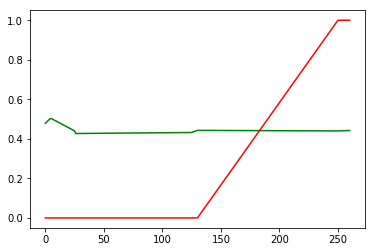

Working on... QCOM
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.005994842503189409
Window: 0
[[115 323]
 [138 333]]
F1,score 0.59094942324756
Accuracy: 0.49284928492849284
1000.0
Window: 4
[[204 253]
 [181 270]]
F1,score 0.5544147843942505
Accuracy: 0.5220264317180616
31.622776601683793
Window: 5
[[268 191]
 [258 191]]
F1,score 0.45968712394705175
Accuracy: 0.5055066079295154
7.196856730011519
Window: 25
[[238 298]
 [205 163]]
F1,score 0.39324487334137515
Accuracy: 0.4435840707964602
2.782559402207126
Window: 26
[[242 298]
 [208 156]]
F1,score 0.38141809290953543
Accuracy: 0.44026548672566373
0.046415888336127774
Window: 125
[[404  90]
 [267 123]]
F1,score 0.40796019900497515
Accuracy: 0.5961538461538461
19.306977288832496
Window: 130
[[259 222]
 [180 222]]
F1,score 0.524822695035461
Accuracy: 0.5447338618346546
0.046415888336127774
Window: 250
[[491  21]
 [212 135]]
F1,score 0.536779324055666
Accuracy: 0.7287543655413271
0.046415888336127774
Window: 260
[[487  42]
 [184 144]]
F1,score 0.5603112840466926
Accuracy: 0.7362893815635939
[0, 0, 0, 0, 

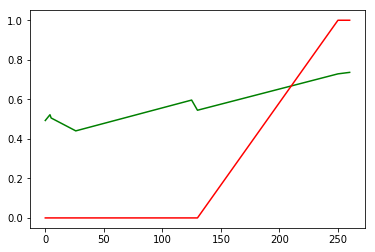

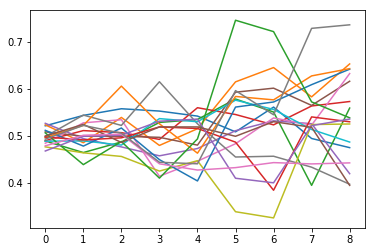

In [10]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    print(senttemp.shape)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,4,5,25,26,125,130,250,260]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(senttemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        CM = f1_score(y_test, prediction)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [21]:
tempacc=accstocksresults
#tempbalance=inbalancinglist

[0.49744633 0.49982114 0.50881459 0.49074452 0.49161761 0.52865887
 0.52555856 0.53750721 0.54427332]


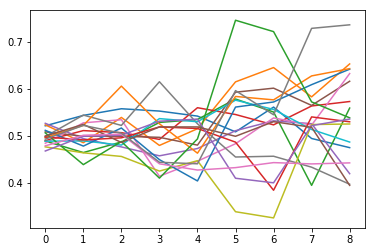

In [22]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

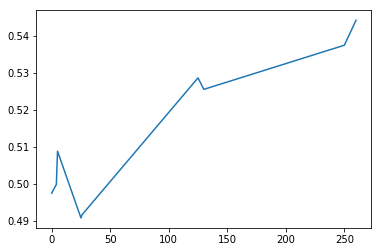

In [23]:
plt.plot(trendwindowtime,t/len(tempacc))
plt.show()